# Model to Predict Customer Churn

##### by Cathryn Amabibi

### Table of Content
##### 1. [Import required packages](#import-required-packages-and-data-cleaning-class)
##### 2. [Import data-set](#import-data-set)
##### 3. [instantiate class and pre-process data](#instantiate-class-and-preprocess-data)
##### 4. [splitting the data](#split-the-data)
##### 5. [scale the data](#scale-the-data)
##### 6. [PCA Component with 2D visualisation and analysis](#PCA-Component-with-2D-visualisation-and-analysis)
##### 7. [spliting data for training and testing of the model](#spliting-data-for-training-and-testing-of-the-model)
##### 8. [Devloping the model](#Devloping-the-model)
##### 9. [Evaluating Data model result](#Evaluating-Data-model-result)

#### import required packages and data cleaning class

In [1]:
import pandas as pd
import numpy as np
import dataCleaning as dc
from dataCleaning import Preprocess

In [2]:
#### import dataset

In [3]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### instantiate class and preprocess data

In [5]:
test1 = dc.Preprocess(df)

In [6]:
df_clean = test1.start_process()

['tenure_0', 'tenure_1', 'tenure_2', 'tenure_3']
['PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2']


/Users/cathryn/dataCleaning.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['tenure'] = df_4['tenure'].apply(create)
/Users/cathryn/dataCleaning.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4[col] = self.le.fit_transform(df_4[col]) # Fit label encoder and return encoded labels.


In [7]:
df_clean.head()

,level_0,index,tenure_0,tenure_1,tenure_2,tenure_3,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,index,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,MonthlyCharges,TotalCharges,Churn
0,0,0,-0.747728,-1.528893,-0.459319,1.715958,-1.813877,-1.470948,1.171332,0,...,0,0,1,0,0,0,1,29.85,29.85,No
1,1,1,1.502196,-1.298470,0.642346,0.795173,0.544609,-1.346957,-0.522320,1,...,0,0,0,1,0,1,0,56.95,1889.50,No
2,2,2,-0.747728,-1.528893,-0.459319,1.715958,0.544609,-1.346957,-0.522320,2,...,0,0,1,0,0,0,1,53.85,108.15,Yes
3,3,3,0.192161,-0.056310,-0.710205,0.604594,-0.395745,-0.067615,-0.587084,3,...,0,0,0,1,0,1,0,42.30,1840.75,No
4,4,4,-0.747728,-1.528893,-0.459319,1.715958,-1.813877,-1.470948,1.171332,4,...,0,0,1,0,0,0,1,70.70,151.65,Yes


In [8]:
df_clean.nunique()

level_0                                 7043
index                                   7043
tenure_0                                   5
tenure_1                                   5
tenure_2                                   5
tenure_3                                   5
PaymentMethod_0                            4
PaymentMethod_1                            4
PaymentMethod_2                            4
index                                   7043
SeniorCitizen                              2
gender_Female                              2
gender_Male                                2
Partner_No                                 2
Partner_Yes                                2
Dependents_No                              2
Dependents_Yes                             2
PhoneService_No                            2
PhoneService_Yes                           2
MultipleLines_No                           2
MultipleLines_No phone service             2
MultipleLines_Yes                          2
InternetSe

In [9]:
# Drop level0 and extra index column from data frame
df_clean.drop(['level_0', 'index', 'index'],axis = 1, inplace = True)

In [10]:
df_clean.nunique()

tenure_0                                   5
tenure_1                                   5
tenure_2                                   5
tenure_3                                   5
PaymentMethod_0                            4
PaymentMethod_1                            4
PaymentMethod_2                            4
SeniorCitizen                              2
gender_Female                              2
gender_Male                                2
Partner_No                                 2
Partner_Yes                                2
Dependents_No                              2
Dependents_Yes                             2
PhoneService_No                            2
PhoneService_Yes                           2
MultipleLines_No                           2
MultipleLines_No phone service             2
MultipleLines_Yes                          2
InternetService_DSL                        2
InternetService_Fiber optic                2
InternetService_No                         2
OnlineSecu

In [11]:
# lambda function to encode churn label
label = {'No': 0, 'Yes': 1}
convert = lambda x: label[x]
df_clean['Churn'] = df_clean['Churn'].apply(convert)

In [12]:
#df_clean['Churn'].unique()

In [13]:
#df_clean['TotalCharges'].isna().sum()

In [14]:
# to drop rows with NaN in TotalCharges column
df_clean = df_clean[df_clean['TotalCharges'].notnull()]

In [15]:
df_clean['TotalCharges'].isna().sum()

0

In [16]:
df_clean.head()

,tenure_0,tenure_1,tenure_2,tenure_3,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,SeniorCitizen,gender_Female,gender_Male,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,MonthlyCharges,TotalCharges,Churn
0,-0.747728,-1.528893,-0.459319,1.715958,-1.813877,-1.470948,1.171332,0,1,0,...,0,0,1,0,0,0,1,29.85,29.85,0
1,1.502196,-1.298470,0.642346,0.795173,0.544609,-1.346957,-0.522320,0,0,1,...,0,0,0,1,0,1,0,56.95,1889.50,0
2,-0.747728,-1.528893,-0.459319,1.715958,0.544609,-1.346957,-0.522320,0,0,1,...,0,0,1,0,0,0,1,53.85,108.15,1
3,0.192161,-0.056310,-0.710205,0.604594,-0.395745,-0.067615,-0.587084,0,0,1,...,0,0,0,1,0,1,0,42.30,1840.75,0
4,-0.747728,-1.528893,-0.459319,1.715958,-1.813877,-1.470948,1.171332,0,1,0,...,0,0,1,0,0,0,1,70.70,151.65,1


#### split the data

In [17]:
## Developing the model
# split the data 
df1 = df_clean
y = df1['Churn']

In [18]:
y.shape


(7032,)

In [19]:
x = df1.drop(['Churn'], axis = 1)
x.shape

(7032, 47)

#### scale the data

In [20]:
from sklearn.preprocessing import StandardScaler as sc

In [21]:
# use standard scaler to fit dataframe feaures # scale the data
# create instance of standard scaler and use it to fit your data frame features and scale the data
sc = sc()  
x_scale = sc.fit_transform(x)

#### PCA Component with 2D visualisation and analysis

In [22]:
# Principal Component Analysis (pca): import Principal component analysis this is use for feature selection in hyper parameter tuning 
from sklearn.decomposition import PCA

In [23]:
pca = PCA(10)

In [24]:
pca.fit(x_scale)

PCA(n_components=10)

In [25]:
# Can capture 75% of data i.e. variance in your data set 
pca.explained_variance_ratio_

array([0.23902555, 0.14289877, 0.09002296, 0.0540809 , 0.04798578,
       0.04260445, 0.03705951, 0.03343992, 0.03116346, 0.0306646 ])

In [26]:
# sum to check it adds up to 1  
sum(pca.explained_variance_ratio_)

0.7489459123933779

In [27]:
x_pca = pca.transform(x_scale)

In [28]:
# create a PCA projection to 2D and add to a dataframe
pca = PCA(2)

In [29]:
# Assign variable to run a fit transform on x_scale
pca2 = pca.fit_transform(x_scale)

In [30]:
# create data frame for pca2 output
pdf2 = pd.DataFrame(data = pca2, columns = ['principal component 1', 'principal component 2'])

In [31]:
# check the new dataframe with pca2 output
pdf2.head()

,principal component 1,principal component 2
0,-1.932005,-3.249664
1,-0.548037,-0.704417
2,-1.020677,-3.049068
3,-1.026850,0.199598
4,-1.749179,-4.457788


In [32]:
# check the output for the original 'Churn' label from the source dataframe
df[['Churn']].head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [33]:
# create a final dataframe that stores a concatenation of pdf2 and 'Churn' and check the output
finaldf2 = pd.concat([pdf2,df[['Churn']]], axis = 1)
finaldf2.head()

,principal component 1,principal component 2,Churn
0,-1.932005,-3.249664,No
1,-0.548037,-0.704417,No
2,-1.020677,-3.049068,Yes
3,-1.026850,0.199598,No
4,-1.749179,-4.457788,Yes


In [34]:
# import packages to visualize the PCA 2D projection output against 'Churn'
from matplotlib import pyplot as plt
import seaborn as sb

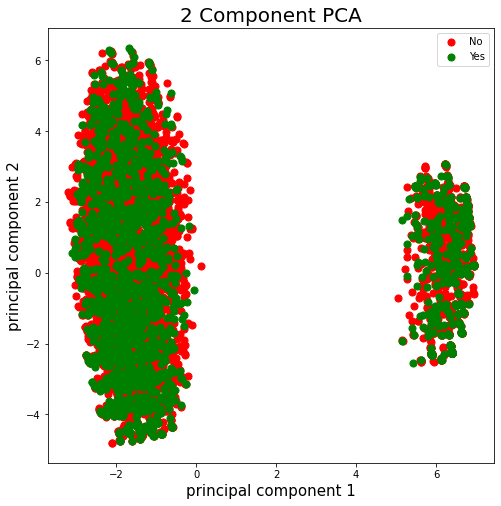

In [35]:
# visualize the PCA 2D projection output against 'Churn'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

churns = ['No','Yes']
colors = ['r','g']
for churn,color in zip(churns,colors):
    indicesToKeep = finaldf2['Churn'] == churn
    ax.scatter(finaldf2.loc[indicesToKeep, 'principal component 1'],
              finaldf2.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    ax.legend(churns)
    ax.grid()

### The Churn features appear to not be well separated and seem to be really clustered together. 
### Churn seems to be weighted heavily in favour of 'Yes' than 'No'

#### spliting data for training and testing of the model

In [36]:
# import training test split from sklearn
from sklearn.model_selection import train_test_split


In [37]:
# Split training and test data from our input and output features
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=145)

In [38]:
x_train.shape

(4922, 47)

In [39]:
y_train.shape

(4922,)

In [40]:
x_test.shape

(2110, 47)

In [41]:
y_test.shape

(2110,)

#### Devloping the model

In [42]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [43]:
# call our classifier
lr = LogisticRegression()

In [44]:
# fit training data to logistic regression method
lr.fit(x_train, y_train)

LogisticRegression()

In [48]:
lr.predict_proba(x_test)

array([[0.60141433, 0.39858567],
       [0.6764359 , 0.3235641 ],
       [0.93929833, 0.06070167],
       ...,
       [0.48833978, 0.51166022],
       [0.34891544, 0.65108456],
       [0.98627514, 0.01372486]])

In [49]:
y_test

2783    0
554     1
1754    0
2703    1
852     0
       ..
2206    1
2116    1
6001    0
95      1
2176    0
Name: Churn, Length: 2110, dtype: int64

In [50]:
# predict our training model outcome based on our test data
predict = lr.predict(x_test)

In [51]:
predict

array([0, 0, 0, ..., 1, 1, 0])

#### Evaluating Data model result

In [47]:
# Data model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

0.8080568720379147
[[1407  146]
 [ 259  298]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1553
           1       0.67      0.54      0.60       557

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

